# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
#первые 5 строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#последние 5 строк таблицы
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#общая информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#переименовываем столбец cityCenters_nearest
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

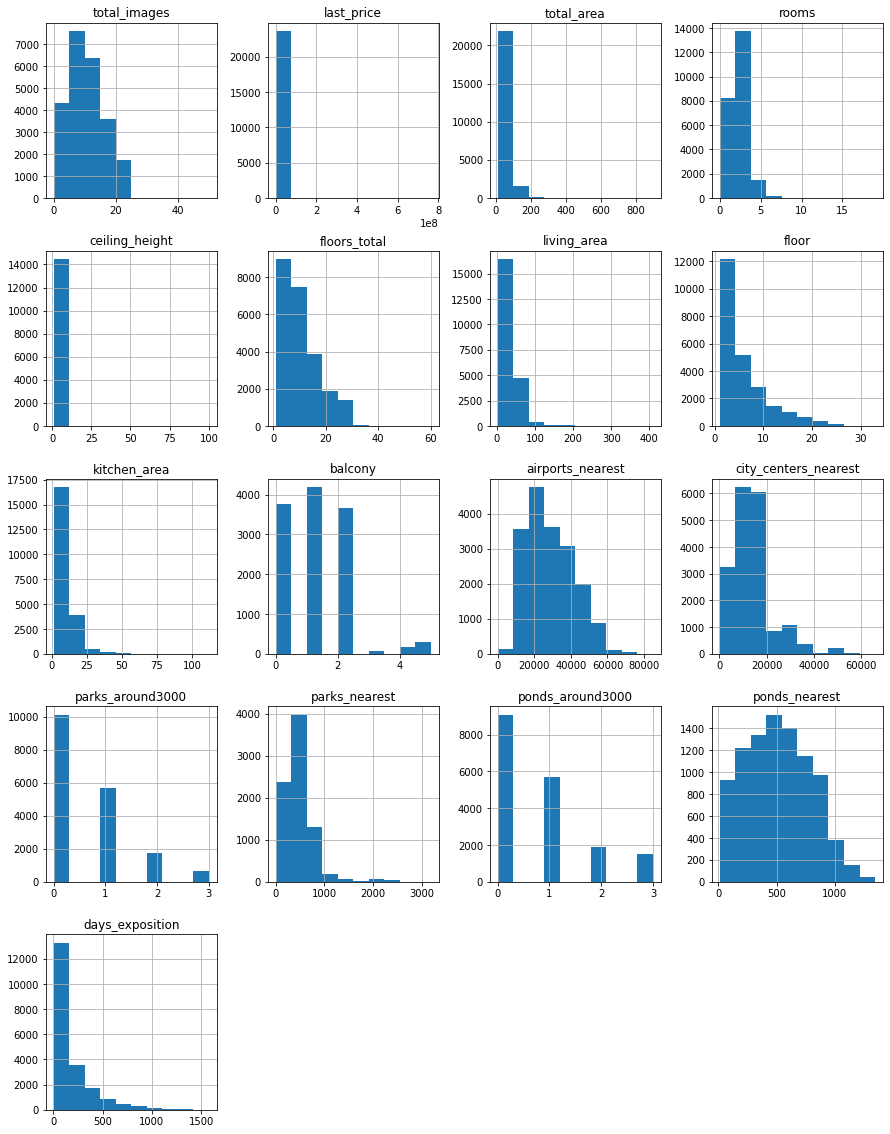

In [6]:
#строим гистограммы
data.hist(figsize=(15, 20));

In [7]:
#количество пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Предобработка данных

#### Пропущенные значения

- ceiling_height - практически в трети объявлений пропущена высота потолков, оставим Null.

- floors_total - данные просто не заполнили, из выборки, оставим Null.

- living_area - оставим Null.

- is_apartment - значений, можем предположить что это не апартаменты и присвоить False.

- kitchen_area - проверить не студия ли это? Если нет, то оставим Null.

- balcony - скорее всего там нет балконов, заполняем 0

- locality_name - данные просто не заполнили, оставим Null

- airports_nearest - аэропортов рядом нет, оставляем Null

- city_centers_nearest - центр города не близко, оставляем Null

- parks_around3000 - значит парков нет в радиусе 3км, оставляем Null

- parks_nearest - значит парков нет, оставляем Null

- ponds_around3000 - значит прудов нет в радиусе 3км, оставляем Null

- ponds_nearest - оставляем Null

- days_exposition - объявление не было опубликовано, оставляем Null

In [8]:
print('Число дубликатов: ',data.duplicated().sum())

Число дубликатов:  0


In [9]:
#удалем строки с пропусками в floors_total
data['floors_total'].dropna(inplace=True)

In [10]:
#заполняем пропуски в is_apartment как 'False'
data['is_apartment'] = data['is_apartment'].fillna('False')

In [11]:
#заполняем пропуски в balcony как '0'
data['balcony'] = data['balcony'].fillna(0)

In [12]:
#удалем строки с пропусками в locality_name
data['locality_name'].dropna(inplace=True)

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Типы данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- last_price -  меняем на int64. Для экономии памяти
- first_day_exposition - меняем на date. Для удобства работы с датой
- floors_total - меняем на Int8. Для экономии памяти
- is_apartment - меняем на bool. Для работы с булевым значением
- balcony - меняем на int8. Для экономии памяти
- days_exposition - меняем на int64. Для экономии памяти

In [15]:
#try чтобы определить ошибки при преобразовании типов
try:
    data['last_price'] = data['last_price'].astype('int64')
    print('1ok')
except:
    print('last_price int type conversion fail')
    
try:    
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
    print('2ok')
except:
    print('first_day_exposition to_datetime type conversion fail')
    
try:
    data['floors_total'] =  data['floors_total'].astype('Int8')
    print('3ok')
except:
    print('floors_total int8 type conversion fail')
      
try:
    data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True})
    print('4ok')
except:
    print('is_apartment bool type conversion fail')
        
try:
    data['balcony'] = data['balcony'].astype('int8')
    print('5ok')
except:
    print('balcony int8 type conversion fail')
    
try:
    data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
    print('6ok')
except:
    print('days_exposition int64 type conversion fail')

1ok
2ok
3ok
4ok
5ok
6ok


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int8          
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          20924 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Уникальные значения

In [17]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 365


In [18]:
#приводим всё к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [19]:
#заменяем все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
loc_length()
print()

Количество уникальных занчений locality_name: 331



In [20]:
#заменяем "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
loc_length()
print()

Количество уникальных занчений locality_name: 324



In [21]:
#проверим наличие явных дубликатов
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


#### Выбросы(аномалии)

In [22]:
#посмотрим на распределение значений в данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [23]:
#last_price - цена
#взглянем на квартиры от 0 до 20 млн, нет квартир стоимостью 0
#есть одна квартира стоимостью меньше 100 000, её мы учитывать не будем
#убираем слишком дорогие квартиры стоимостью больше 100.000.000
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

Квартир стоимостью 0: 0
Квартир стоимостью меньше 100.000: 1
Квартир стоимостью больше 100.000.000: 37


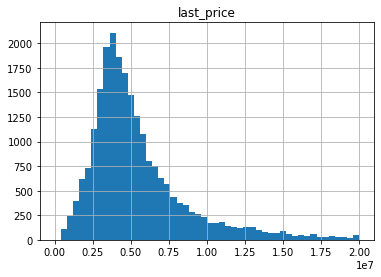

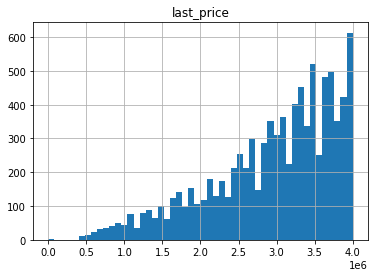

In [24]:
data.hist('last_price', bins=50, range=(0,2e+07));
data.hist('last_price', bins=50, range=(0,4e+06));

data.drop(index=data.query('last_price < 1e+05').index,inplace=True)

Квартир площадью менее 10 кв.м.: 0
Квартир площадью более 500 кв.м.: 3


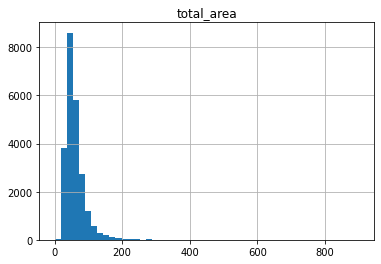

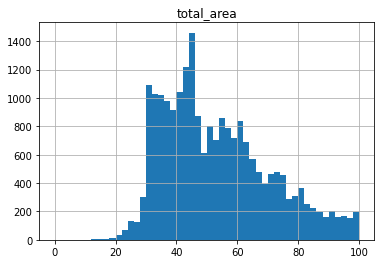

In [25]:
#total_area - общая площадь
#нет квартир площадью меньше 10 кв.м.
#квартиры площадью более 500 кв.м немного, удаляем их
print('Квартир площадью менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())

data.drop(index=data.query('total_area > 500').index,inplace=True)

data.hist('total_area', bins=50, range=(0,900));
data.hist('total_area', bins=50, range=(0,100));

In [26]:
#ceiling_height - высота потолков
#стандартная высота от пола до потолка должна быть в пределах 2,5-3,2 метров
#можно предположить, что квартиры с высотой потолков 25-36м на самом деле являются опечаткой и соотвествуют 2.5-3.6м
#исходя их этого предполагаем, что все квартиры с высотой потолков от 36м являются выбросами
print('Квартир с потолками от 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 25м до 36м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 25м до 36м: ' + str(data.query('ceiling_height > 36 and ceiling_height < 50')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()) + ' шт.')

Квартир с потолками от 4 до 5м: 36 шт.
Квартир с потолками от 5 до 25м: 14 шт.
Квартир с потолками от 25м до 36м: 19 шт.
Квартир с потолками от 25м до 36м: 0 шт.
Квартир с потолками от 50м: 1 шт.


In [27]:
#удаляем квартиры с высотой потолков от 4 до 25метров
#квартиры с высотой потолков до 25 до 36 метров предполагаем, что это опечатка и делим на 10, получая 2.5 и 3.6 метра
#удаляем квартиры с высотой потолков от 36 метров
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

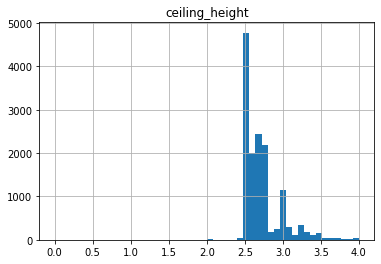

In [28]:
#изучаем квартиры где высота потолков менее 2.5 метров
data.hist('ceiling_height',bins=50,range=(0,4));

In [29]:
#удаляем квартиры где высота потолков менее 2.5 метров
print('Квартир с потолками меньше 2.5м : ' + str(data.query('ceiling_height < 2.5')['ceiling_height'].count()) + ' шт.')

data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

Квартир с потолками меньше 2.5м : 73 шт.


Квартир в одноэтажных домах :  23
Квартир в 30+ этажных домах :  31


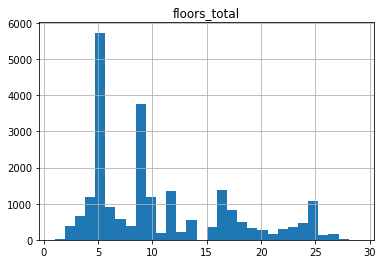

In [30]:
#floors_total - общее количество этажей
#есть одноэтажные квартиры,но это не похоже на выброс
#есть небольшое количество квартир в 30 и более этажных домах
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data.query('floors_total > 30')['floors_total'].count())

data.drop(index=data.query('floors_total > 30').index,inplace=True)

data.hist('floors_total', bins=30);

Жилая площадь меньше 10 кв.м.:  25
Жилая площадь больше общей:  0
Жилая площадь больше 200:  16


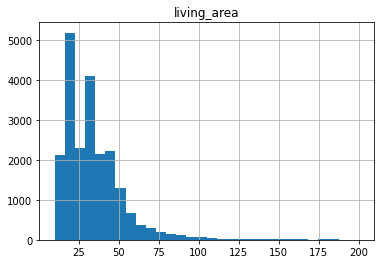

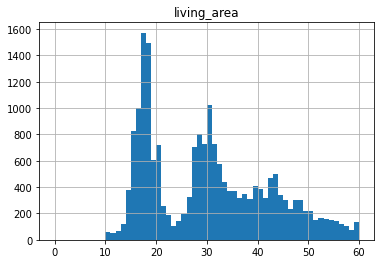

In [31]:
#living_area - жилая площадь
#имеем большое количество квартир с жилой площадью от 10 до 60 кв.м.
#здесь интерсуют квартиры с жилой площадью меньше 10 кв.м. их 25!
#судя по гистограмме есть даже с жилой площадью 2 кв.м.
#отбросим значения с жилой площадью меньше 10кв.м.
#отбросим квартиры с площадью более 200 кв.м.
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())

data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

data.hist('living_area', bins=30);
data.hist('living_area', bins=60, range=(0,60));

Этаж 0 0
Этаж 0 0
Этаж больше количества этажей:  0


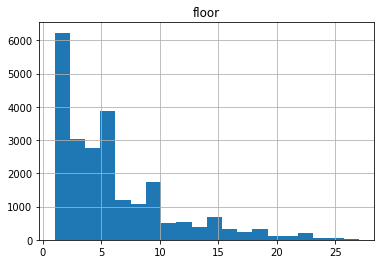

In [32]:
#floor - этаж
#здесь нет нулевых значений и слишком больших значений
print('Этаж 0',data.query('floor == 0')['floor'].count())
print('Этаж 0',data.query('floor > 30')['floor'].count())
print('Этаж больше количества этажей: ',data.query('floor > floors_total')['floor'].count())

data.hist('floor',bins=20);

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни 5 кв.м.:  352
Площадь кухни больше 50 кв.м.:  33
Площадь кухни больше общей:  0


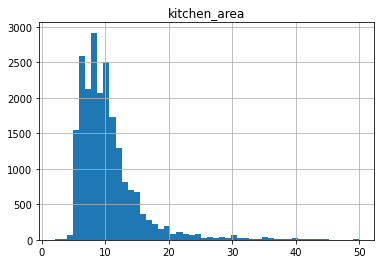

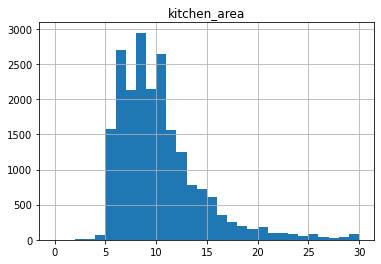

In [33]:
#kitchen_area - площадь кухни
#есть одна квартира с площадью кухни меньше 1 кв. метра. Явно аномалия.
#удалим строки с кухнями менее 2кв.м. и больше 50кв.м.
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

data.hist('kitchen_area', bins=50);
data.hist('kitchen_area', bins=30, range=(0,30));

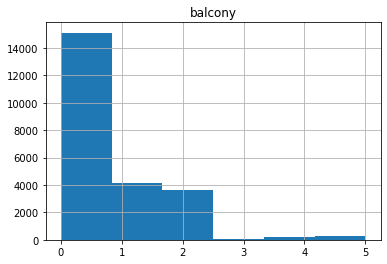

In [34]:
#balcony - балкон
data.hist('balcony', bins=6);

Объявление не было оопубликовано:  0
Объявлению больше 3 лет :  166


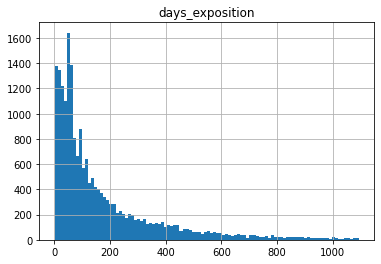

In [35]:
#days_exposition - сколько дней было размещено объявление
#объявления, которые висели дольше 3-х лет отбросим
print('Объявление не было оопубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())
print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

data.hist('days_exposition', bins=100);

Квартир слишком близко к аэропорту: 1


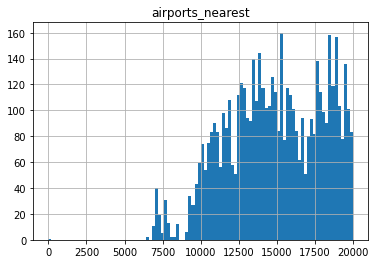

In [36]:
#airports_nearest - квартира ближе 5 км к аэропорту одна, удаляем ее
print('Квартир слишком близко к аэропорту:',data.query('airports_nearest < 5000')['airports_nearest'].count())
data.hist('airports_nearest', bins=100, range=(0,20000));

data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

In [37]:
#сбросим индексацию после удаления строк
data.reset_index(drop=True,inplace=True)

По результату проведённой обработки данных, можно сказать что довольно большая часть данных, которая может влиять на итоговую статистику,потеряны или внесены с ошибками. Об этом необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [38]:
#цена одного квадратного метра
data['cost_per_sqm'] = data['last_price'] / data['total_area']

In [39]:
#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek

In [40]:
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [41]:
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [42]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

data['floor_category_digit'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

In [43]:
data['floor_category_digit'].value_counts()

1    17136
2     3250
0     2874
Name: floor_category_digit, dtype: int64

In [44]:
#расстояние в км до центра города
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
try:
    data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('Int32')
    print('city_centers_nearest_km ok')
except:
    print('city_centers_nearest_km Int32 type conversion fail')

city_centers_nearest_km ok


### Проведите исследовательский анализ данных

#### Гистограммы

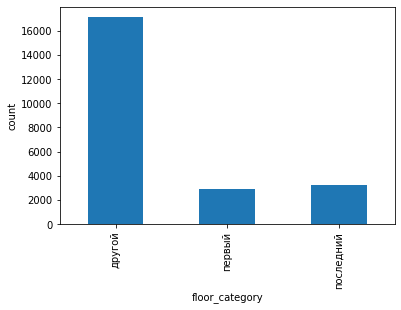

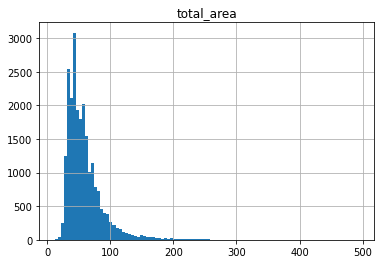

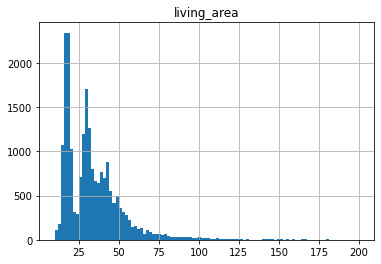

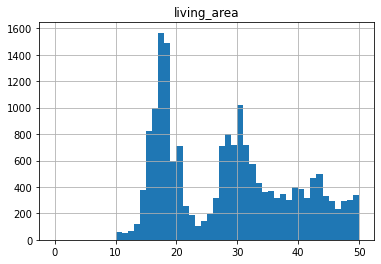

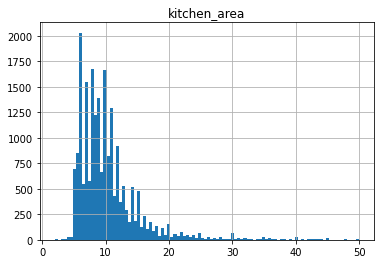

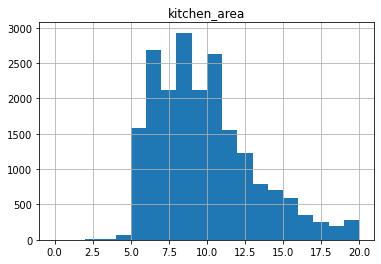

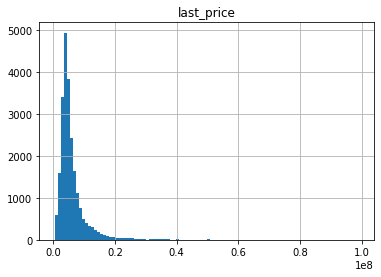

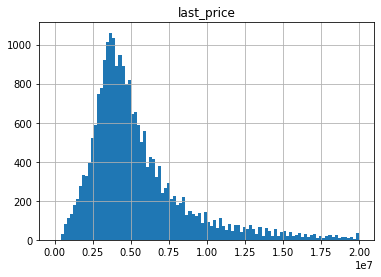

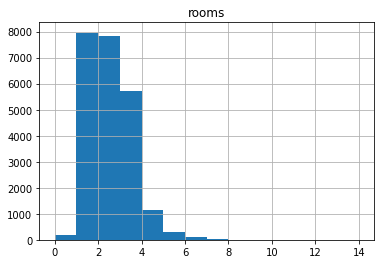

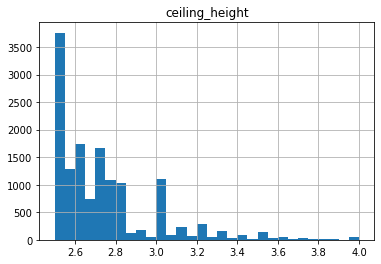

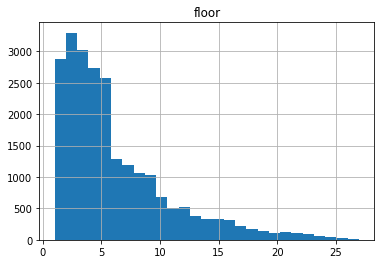

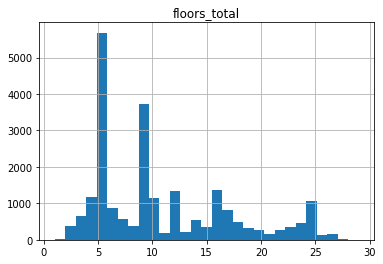

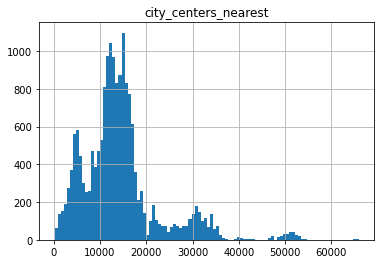

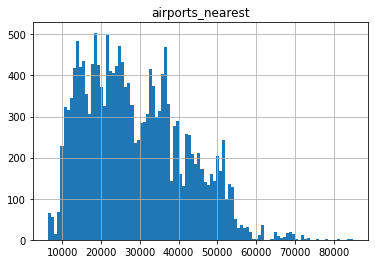

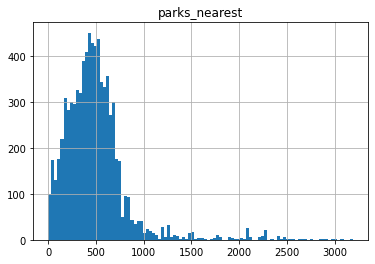

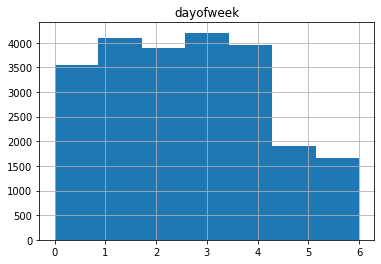

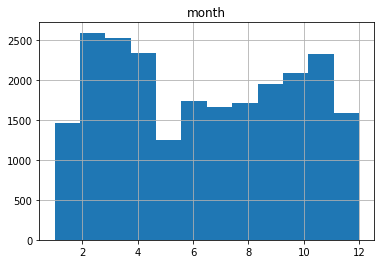

In [45]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count');

data.hist('total_area', bins=100);

data.hist('living_area', bins=100);
data.hist('living_area', bins=50, range=(0,50));

data.hist('kitchen_area', bins=100);
data.hist('kitchen_area', bins=20, range=(0,20));

data.hist('last_price', bins=100);
data.hist('last_price', bins=100, range=(0,2e+07));

data.hist('rooms', bins=data['rooms'].max());

data.hist('ceiling_height', bins=30);

data.hist('floor', bins=data['floor'].max());

data.hist('floors_total', bins=data['floors_total'].max());

data.hist('city_centers_nearest', bins=100);

data.hist('airports_nearest', bins=100);

data.hist('parks_nearest', bins=100);

data.hist('dayofweek', bins=7);

data.hist('month', bins=12);

- Тип этажа квартиры («первый», «последний», «другой») в этом случае используем тип bar. Больше всего квартир на "другом" этаже и это логично. Первых и последних этажей одинакого мало.
- Общая площадь. Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м.
- Жилая площадь. Наблюдаем два пика - на 18 кв.м. и на 30 кв.м. Нужно проверить, почему у нас именно два пика и почему есть явный провал около 24 кв.м.
- Площадь кухни. Площадь кухни выглядит хорошо.
- Цена объекта. Цена объекта выглядит хорошо.
- Количество комнат. Больше всего двух- и трёх-комнатных квартир, но встречаются и редкие исключения.
- Высота потолков. Здесь два пика 2.5м и 3м, что логично.
- Этаж квартиры. Больше всего квартир с 1 по 5 этаж. Логино, питер не город небоскрёбов.
- Общее количество этажей в доме. Видим явные пики: 5-этажная застройка, 9-этажная застройка, и небольшие пики более высоких новостроек.
- Расстояние до центра города в метрах. Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км. до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км.
- Расстояние до ближайшего аэропорта. Здесь видим довольно "шумный" график. Но это вполне нормально.
- Расстояние до ближайшего парка. Судя по графику больше всего квартир с парками на расстоянии до 750м.
- День и месяц публикации объявления. Видим провал в публикации объявлений в субботу и воскресенье, что логично. Так же видим что с февраля по апрель наблюдалосась повышенная активность. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

#### Как быстро продавались квартиры (столбец days_exposition)

Среднее время продажи квартиры в днях: 171
Медианное время продажи квартиры в днях: 93

[Выбросы] Количество объявлений, которые сняты через:
45 дней: 870
60 дней: 535
90 дней: 203


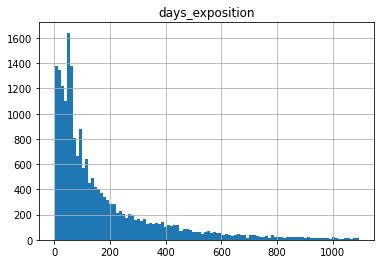

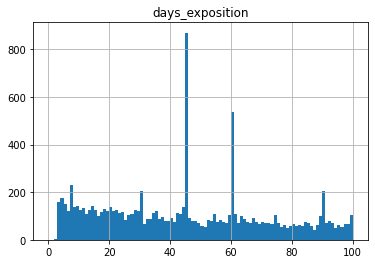

In [46]:
data.hist('days_exposition', bins=100);
data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

print('\n[Выбросы] Количество объявлений, которые сняты через:')
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

Можно сказать, что среднее время продажи квартиры составляет 171 день или целые полгода. Но если взять медиану - то это уже 93 дней, в два раза меньше. Почему так? Потому что у нас есть "длинный хвост" квартир, которые продавались очень долго, буквально годами.
Я бы предложил считать быстрыми продажи до 93 дней, а необычно долгими - свыше 171 дня. Выбросы похожи на платные объявлени с истекшим сроком размещения или работу ситемы удаления неактивных объявлений.

#### Факторы больше всего влияющие на общую (полную) стоимость объекта

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

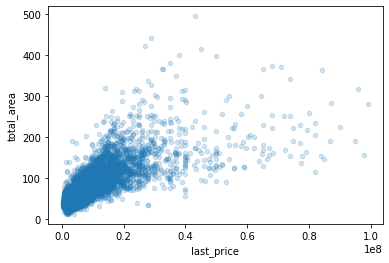

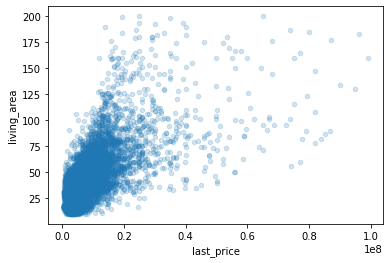

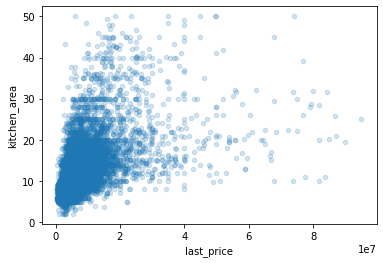

In [47]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

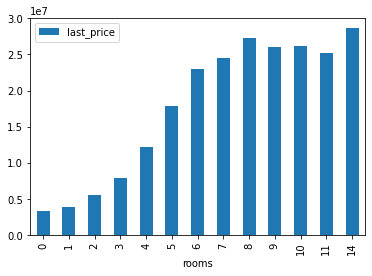

In [48]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

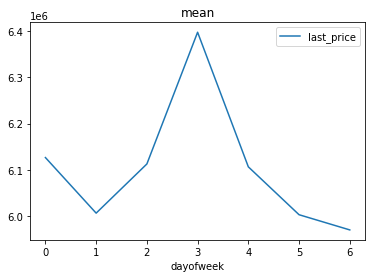

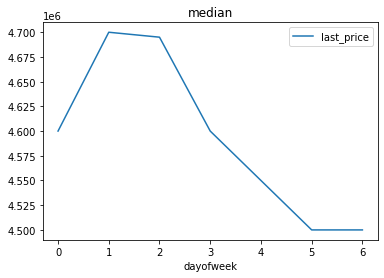

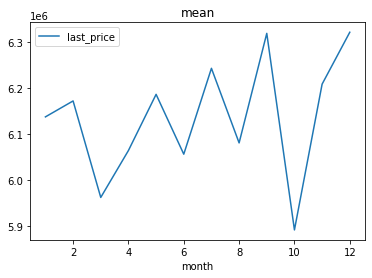

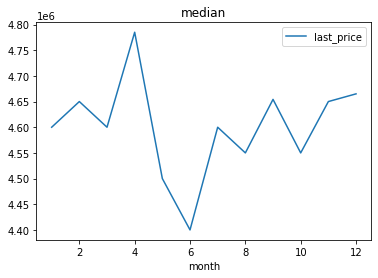

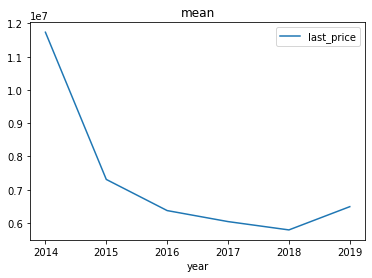

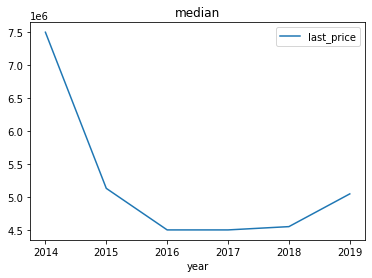

In [49]:
data.pivot_table(index='dayofweek',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='dayofweek',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Цена по убыванию зависит от: общей площади; жилой площади; площади кухни; количества комнат.

Цена практически на зависит от: этажа, на котором расположена квартира; даты размещения.

<AxesSubplot:xlabel='last_price', ylabel='floor_category'>

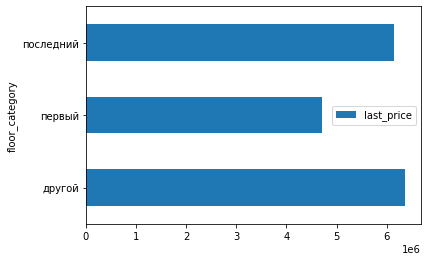

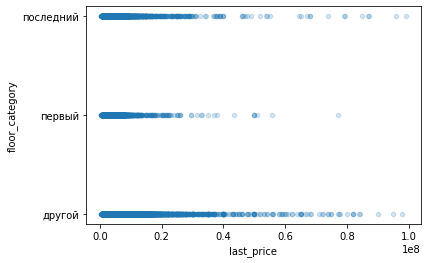

In [50]:
data.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='barh');

data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.2)

#### Среднюю цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

<AxesSubplot:ylabel='locality_name'>

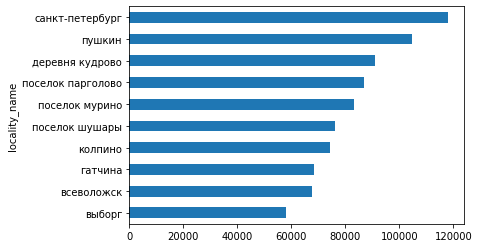

In [51]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh')

In [52]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category,floor_category_digit,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,<NA>,120370.370370,3,3,2019,другой,1,16
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0,19
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558,92785.714286,3,8,2015,другой,1,14
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,234.0,424,408176.100629,4,7,2015,другой,1,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.000000,1,6,2018,другой,1,8


In [53]:
data['rooms'].value_counts()

1     7957
2     7814
3     5702
4     1138
5      297
0      192
6       94
7       44
8       10
9        6
10       3
11       2
14       1
Name: rooms, dtype: int64

In [54]:
data.groupby(by='rooms')['rooms'].count().sort_values(ascending=False)

rooms
1     7957
2     7814
3     5702
4     1138
5      297
0      192
6       94
7       44
8       10
9        6
10       3
11       2
14       1
Name: rooms, dtype: int64

Самая дорогая недвижимость в Санкт-Петербурге. В ТОП-10 входят ближайшие к Санкт-Петербургу города.

#### Расстояние до центра города

<AxesSubplot:xlabel='city_centers_nearest_km'>

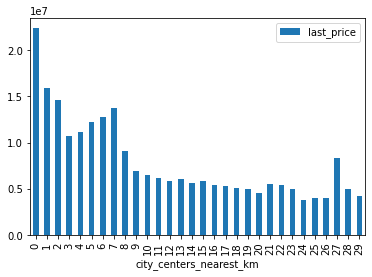

In [55]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
)

С большим отрывом лидирует недвижимость до 1км. Видим более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно. Далее цена спадает на расстоянии от 8 км. до 27 км. Видим пик на 27км, его сложно объяснить, возможно это недвижимость в "особом" районе.

### Общий вывод

После изучения данных можно сказать, что можно работать с таблицами, в которых встречаются пропущенные значения. Данные всё-таки лучше очищать от явных "выбросов", но возможно чистить данные придётся после этапа исследовательского анализа данных. В нашем примере - это дорогие квартиры, которые портили корреляции и графики зависимости полной стоимости от разных параметров. Из необычных особенностей:

- В 27 км от центра Санкт-Петербурга есть недвижимость по цене почти равная недвижимости в 8 км. от центра;
- В ТОП-10 входят в основном ближайшие к Санкт-Петербургу города и самые крупные города области: Пушкин; Гатчина; Всеволожск; Выборг.

Цена в основном зависит от площади квартиры, но корреляция с этажностью(не первый и не последний) видна на графике. Таких квартир явно больше и они явно дороже.

Быстрые продажи это до 95 дней, а необычно долгие - свыше 171 дня.
Выбросы Количество объявлений, которые сняты через:
- 45 дней: 870
- 60 дней: 535
- 90 дней: 203

Предполагаю, что данные взяты с площадки, где неактивные объявления автоматически снимаются, если пользователь не продлит время размещения через определёный срок. Либо присутсвует платное рамещение. Нужно связаться с тем, кто предоставляет данные.